In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
data = scipy.io.loadmat('wB97X/rdf.mat', squeeze_me=True)

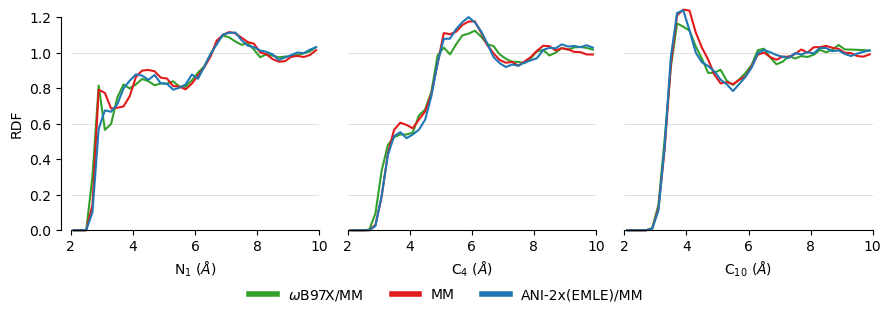

In [3]:
keys = ['n1', 'c4', 'c10']
titles = {'n1': 'N$_1$', 'c4': 'C$_4$', 'c10': 'C$_{10}$'}
colors = ['#33a02c', '#e31a1c', '#1f77b4']

x = data['bins']

fig, axs = plt.subplots(1, 3, figsize=(9, 3))

for ax, key in zip(axs, keys):

    for rdf, color in zip(data[key], colors):
        ax.plot(x, rdf, c=color)[0].set_clip_on(False)    

    ax.set_xlabel(f'{titles[key]} ($\AA$)')
    ax.set_xlim([2, 10])
    ax.set_ylim([0, 1.2])
    ax.set_yticks(np.arange(0, 1.3, 0.2))
    for y in np.arange(0.2, 1.2, 0.4):
        ax.axhline(y=y, xmin=0, xmax=1, color='lightgrey', 
                   linewidth=0.5, zorder=-1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
for ax in axs[1:]:
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)

axs[0].spines['left'].set_position(('data', 1.7))
axs[0].set_ylabel('RDF')

custom_lines = [Line2D([0], [0], color=color, lw=4) for color in colors]
plt.figlegend(custom_lines, 
              ['$\omega$B97X/MM', 'MM', 'ANI-2x(EMLE)/MM'], 
              loc='lower center', 
              ncol=3,
              bbox_to_anchor=(0.5, -0.07),
              frameon=False)

plt.tight_layout()
plt.savefig('FigS12.png', dpi=300, bbox_inches='tight')